In [125]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In a new cell type: %matplotlib inline. This will make your plots show in the notebook without having to call plt.show() every time. Helpful down the road!

In [126]:
%matplotlib inline

Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [127]:
gdp_df = pd.read_csv("..\data\gdp_percapita.csv",nrows=6729)
gdp_df.iloc[:6]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


Read in internet_use required clean up to exclude the bad lines with 'error_bad_lines=False' and then remove footnotes using iloc to identify where they started (row 4495 is the last row of data so nrows=4495 reduced to that ending row)

In [128]:
#internet_df = pd.read_csv("..\data\internet_use.csv",error_bad_lines=False)
internet_df = pd.read_csv("..\data\internet_use.csv",nrows=4495)
#internet_df.iloc[4494]
internet_df.iloc[:6]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


Look at the shape of each dataframe - how many rows, how many columns.

In [129]:
gdp_df.shape

(6729, 4)

In [130]:
internet_df.shape

(4495, 4)

Take a look at the data types for the columns in each table.

In [131]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [132]:
print(internet_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


Take a look at the last 10 rows of each dataset in turn.

In [133]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [134]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


Drop the 'value footnotes' data from both datasets. Check that this worked as expected.
COMMENT: df = df[df.columns.drop(col_to_drop)] didn't work but dropna(axis=1) did work and adding axis=1 fixes the other

In [135]:
# column_to_drop = ['Value Footnotes']
# gdp_df = gdp_df[gdp_df.drop(column_to_drop)]
gdp_df = gdp_df.dropna(axis = 1)
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [136]:
internet_df = internet_df.drop(columns=["Value Footnotes"],axis=1)

In [137]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [138]:
gdp_df = gdp_df.rename(columns={"Country or Area":"Country", "Value": "GDP_Per_Capita"})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [139]:
internet_df = internet_df.rename(columns={"Country or Area":"Country", "Value": "Internet_Users_Pct"})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. 
Call the new DataFrame gdp_and_internet_use.
Look at the first five rows of your new data frame to confirm the columns are how you expect.

In [140]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country','Year'],how='inner')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
1,Afghanistan,2013,1807.762344,5.900000
2,Afghanistan,2012,1772.764974,5.454545
3,Afghanistan,2011,1626.764793,5.000000
4,Afghanistan,2010,1671.581238,4.000000


Look at the last five rows to make sure the data is clean and as expected.

In [141]:
gdp_and_internet_use.tail(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3509,Zimbabwe,2002,2706.031494,3.994356
3510,Zimbabwe,2001,2977.768505,0.799846
3511,Zimbabwe,2000,2945.993212,0.401434
3512,Zimbabwe,1999,3054.064189,0.161676
3513,Zimbabwe,1998,3099.076182,0.081648
3514,Zimbabwe,1997,3036.422224,0.033080
3515,Zimbabwe,1996,2985.856605,0.016790
3516,Zimbabwe,1995,2736.486436,0.007684
3517,Zimbabwe,1994,2768.309953,0.001739
3518,Zimbabwe,1990,2819.549467,0.000000


Look at the shape of the new dataset. Were any rows dropped?

In [142]:
gdp_and_internet_use.shape

(3519, 4)

Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [143]:
subset = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
subset.shape

(488, 4)

Create three new data frames, one for 2004, one for 2009, and one for 2014. 
Give them meaningful names that aren't too long.

In [144]:
gdp_internet_2004 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004])]
gdp_internet_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2004,1025.208245,0.105809
23,Albania,2004,7001.054082,2.420388
44,Algeria,2004,11845.170512,4.634475
66,Angola,2004,4604.657044,0.464815
86,Antigua and Barbuda,2004,21161.123532,24.266544


In [145]:
gdp_internet_2009 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2009])]
gdp_internet_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2009,1502.354073,3.55
18,Albania,2009,9525.377979,41.20
39,Algeria,2009,12697.690780,11.23
61,Angola,2009,6292.534856,6.00
81,Antigua and Barbuda,2009,22568.626530,42.00


In [146]:
gdp_internet_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2014])]
gdp_internet_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.39
13,Albania,2014,10700.993216,60.10
34,Algeria,2014,13557.769757,18.09
56,Angola,2014,6813.052106,21.26
76,Antigua and Barbuda,2014,20440.540555,64.00


Which country had the highest percentage of internet users in 2014? What was the percentage? Repeat for 2004 and 2009. 
(Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).

In [147]:
print(gdp_internet_2004.loc[gdp_internet_2004['Internet_Users_Pct'].idxmax()])

Country                Sweden
Year                     2004
GDP_Per_Capita        40177.9
Internet_Users_Pct      83.89
Name: 3002, dtype: object


In [148]:
print(gdp_internet_2009.loc[gdp_internet_2009['Internet_Users_Pct'].idxmax()])

Country               Iceland
Year                     2009
GDP_Per_Capita        41505.1
Internet_Users_Pct         93
Name: 1400, dtype: object


In [149]:
print(gdp_internet_2014.loc[gdp_internet_2014['Internet_Users_Pct'].idxmax()])

Country               Iceland
Year                     2014
GDP_Per_Capita        42774.9
Internet_Users_Pct      98.16
Name: 1395, dtype: object


Which country had the lowest percentage of internet users in 2014? What was the percentage? Repeat for 2004 and 2009.

In [150]:
#gdp_internet_2014.dropna(axis=1)
#gdp_internet_2014.loc[gdp_internet_2014['Internet_Users_Pct'] >-1].min()
# unable to exclude as above yet so using inner join for merge
gdp_internet_2014.loc[gdp_internet_2014['Internet_Users_Pct'].idxmin()]


Country               Timor-Leste
Year                         2014
GDP_Per_Capita            6466.74
Internet_Users_Pct           1.14
Name: 3104, dtype: object

Lowest Internet Usage using INNER join on merge above
in 2014 was Timor-Leste at 1.14%
2009 was Timor-Leste at 0.18%
2004 was Myanmar at 0.02%

Lowest Internet Usage using OUTER join on merge above
in 2014, 2009 and 2004 was Dem. People's Rep. of Korea 0%


In [151]:
#gdp_internet_2009.dropna()
gdp_internet_2009.loc[gdp_internet_2009['Internet_Users_Pct'].idxmin()]

Country               Timor-Leste
Year                         2009
GDP_Per_Capita            9275.53
Internet_Users_Pct       0.185252
Name: 3109, dtype: object

In [152]:
#gdp_internet_2004.dropna()
gdp_internet_2004.loc[gdp_internet_2004['Internet_Users_Pct'].idxmin()]

Country                 Myanmar
Year                       2004
GDP_Per_Capita          1999.71
Internet_Users_Pct    0.0243374
Name: 2146, dtype: object

Which country had the highest gdp per capita in 2014? What was the gdp per capita?
Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [155]:
print(gdp_internet_2014.loc[gdp_internet_2014['GDP_Per_Capita'].idxmax()])

print(gdp_internet_2014.loc[gdp_internet_2014['GDP_Per_Capita'].idxmin()])

Country                Qatar
Year                    2014
GDP_Per_Capita        116694
Internet_Users_Pct     91.49
Name: 2556, dtype: object
Country               Burundi
Year                     2014
GDP_Per_Capita         768.47
Internet_Users_Pct       1.38
Name: 539, dtype: object


Country with highest GDP_per_Capita was Qatar at 116,694
Country with lowest GDP_Per_Capita was Burundi at 768.47

Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

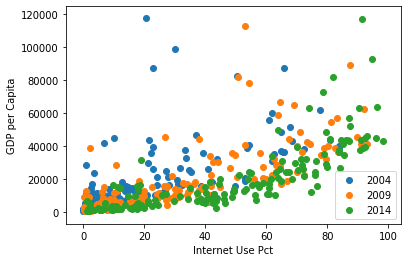

In [210]:
plt.scatter(gdp_internet_2004.Internet_Users_Pct, gdp_internet_2004.GDP_Per_Capita, label="2004") 
plt.scatter(gdp_internet_2009.Internet_Users_Pct, gdp_internet_2009.GDP_Per_Capita, label="2009")
plt.scatter(gdp_internet_2014.Internet_Users_Pct, gdp_internet_2014.GDP_Per_Capita, label="2014")
plt.legend(loc="lower right")
plt.xlabel("Internet Use Pct")
plt.ylabel("GDP per Capita")
plt.show()

Are there differences across years? What do the plots tell you about any relationship between these two variables? 
Enter your observations as a markdown cell.
Observations:
For GDP in 2004 the highest GDP did not necessarily correlate with high Internet usage, 
by 2009 Internet usage was growing closer to 60% for the higher GDP and 
for 2014 Internet usage rates grow and seem to pull GDP up with the growth

Look at the distribution of gdp per capita values for 2014. Is it unimodal?
YES, GDP per capita for 2014 (and each year) is clearly unimodal

Look at the distribution of Internet Use for 2014. Is it unimodal?
NO, Internet usage percent for 2014 is not clearly unimodal

What are the top 5 countries in terms of internet use in 2014?
With an INNER join: Iceland, Norway, Denmark, Luxembourg, Netherlands
With an OUTER join:

In [208]:
gdp_internet_top5_2014 = gdp_internet_2014.nlargest(5,"Internet_Users_Pct")
gdp_internet_top5_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1395,Iceland,2014,42774.888849,98.16
2310,Norway,2014,63328.259526,96.30
854,Denmark,2014,45057.083449,95.99
1812,Luxembourg,2014,92349.186429,94.67
2199,Netherlands,2014,46238.209707,93.17


Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [ ]:
Top_5 = 
top_5_internet = gdp_internet_use[gdp_and_internet_use.isin([])